In [1]:
import sys
sys.path.append('../..')

# basic data science stack
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# my stuff
from models import KNearestNeighborsClassifier
from utils.data_utils import split_dataset

# Binary Classification

In [2]:
rng = np.random.default_rng(seed = 9999)

num_centroids = 10
num_features = 2

pos_centroids = rng.normal(loc=[0, 1], scale=1, size=(num_centroids, num_features))
neg_centroids = rng.normal(loc=[1, 0], scale=1, size=(num_centroids, num_features))

In [3]:
num_samples = 250
X = rng.normal(loc=0, scale=1, size=(num_samples, 2))

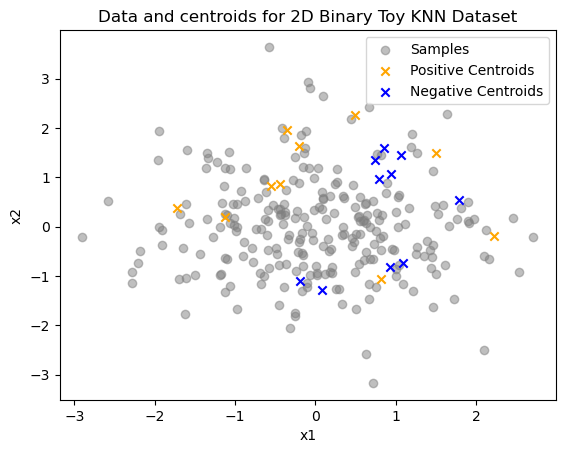

In [4]:
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.5)
plt.scatter(pos_centroids[:, 0], pos_centroids[:, 1], c='orange', marker='x')
plt.scatter(neg_centroids[:, 0], neg_centroids[:, 1], c='blue', marker='x')
plt.legend(['Samples', 'Positive Centroids', 'Negative Centroids'])

plt.title('Data and centroids for 2D Binary Toy KNN Dataset')
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

In [5]:
# assign class labels by computing distance to each centroid and assigning class based on closest one
y = np.zeros(num_samples)
for i in range(num_samples):
    x = X[i]
    pos_distances = np.linalg.norm(x - pos_centroids, axis=1)
    neg_distances = np.linalg.norm(x - neg_centroids, axis=1)
    y[i] = 1 if np.argmin(np.concatenate([pos_distances, neg_distances])) < len(pos_centroids) else 0

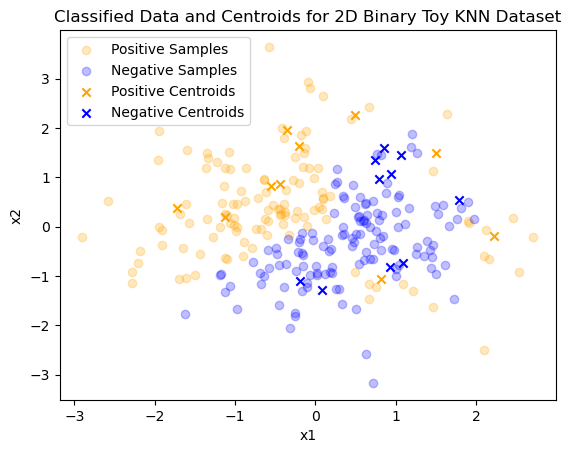

In [6]:
X_pos = X[y == 1]
X_neg = X[y == 0]

plt.scatter(X_pos[:, 0], X_pos[:, 1], c='orange', alpha=0.25)
plt.scatter(X_neg[:, 0], X_neg[:, 1], c='blue', alpha=0.25)

plt.scatter(pos_centroids[:, 0], pos_centroids[:, 1], c='orange', marker='x')
plt.scatter(neg_centroids[:, 0], neg_centroids[:, 1], c='blue', marker='x')

plt.legend(['Positive Samples', 'Negative Samples', 'Positive Centroids', 'Negative Centroids'])

plt.title('Classified Data and Centroids for 2D Binary Toy KNN Dataset')
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

In [7]:
# split dataset
X_train, y_train, X_test, y_test = split_dataset(X, y, test_size=0.2, seed=1738)

In [8]:
model = KNearestNeighborsClassifier(type='binary')
model.fit(X_train, y_train)

In [9]:
train_accuracies = np.zeros(X_train.shape[0])
test_accuracies = np.zeros(X_train.shape[0])

for k in range(1, X_train.shape[0]+1):
    train_accuracy = model.accuracy(X_train, y_train, k)
    test_accuracy = model.accuracy(X_test, y_test, k)
    train_accuracies[k-1] = train_accuracy
    test_accuracies[k-1] = test_accuracy

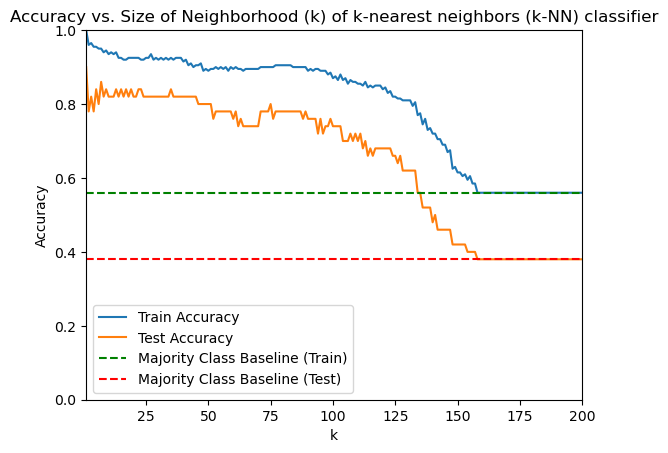

In [10]:
plt.plot(range(1, X_train.shape[0]+1), train_accuracies)
plt.plot(range(1, X_train.shape[0]+1), test_accuracies)
plt.title('Accuracy vs. Size of Neighborhood (k) of k-nearest neighbors (k-NN) classifier')
plt.xlabel('k')
plt.ylabel('Accuracy')

plt.xlim([1, X_train.shape[0]])
plt.ylim([0, 1])

y_train_majority_class = (y_train.mean() > 0.5).astype(int)
majority_class_baseline_train = y_train.mean() if y_train_majority_class == 1 else 1 - y_train.mean()
majority_class_baseline_test = y_test.mean() if y_train_majority_class == 1 else 1 - y_test.mean()

plt.axhline(y=majority_class_baseline_train, color='g', linestyle='--')
plt.axhline(y=majority_class_baseline_test, color='r', linestyle='--')

plt.legend(['Train Accuracy', 'Test Accuracy', 'Majority Class Baseline (Train)', 'Majority Class Baseline (Test)'])

plt.show()

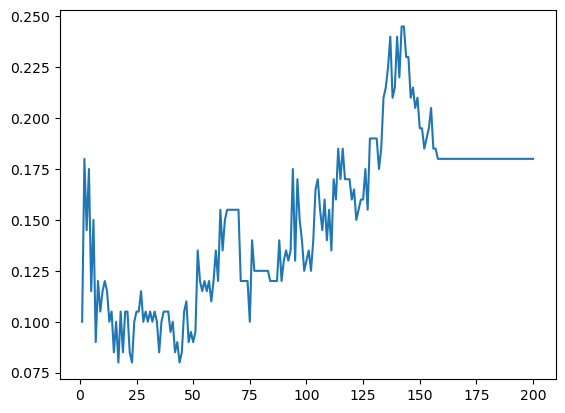

In [11]:
train_test_acc_abs_diff = np.abs(train_accuracies - test_accuracies)
plt.plot(range(1, X_train.shape[0]+1), train_test_acc_abs_diff)

# Plot Decision Boundary

In [12]:
x1 = np.linspace(start=X[:, 0].max(), stop=X[:, 0].min(), num=1000)
x2 = np.linspace(start=X[:, 1].max(), stop=X[:, 1].min(), num=1000)

grid_x1, grid_x2 = np.meshgrid(x1, x2)

grid = np.concatenate([grid_x1.reshape(1000**2, 1), grid_x2.reshape(1000**2, 1)], axis=1)

y_hat_grid = model(grid, k=10)

/Users/christian_g/anaconda3/envs/models_from_scratch/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


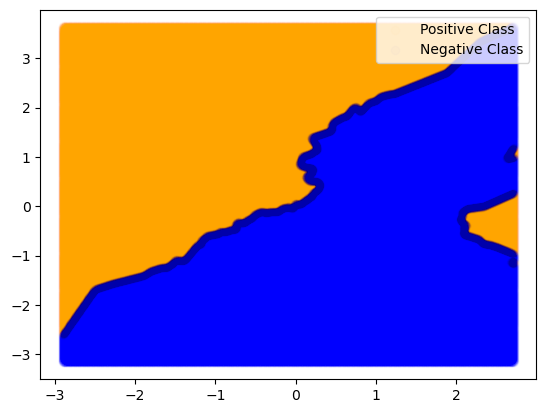

In [13]:
# plot separately, make positive class orange and negative class blue
plt.scatter(grid[y_hat_grid == 1, 0], grid[y_hat_grid == 1, 1], c='orange', alpha=0.01)
plt.scatter(grid[y_hat_grid == 0, 0], grid[y_hat_grid == 0, 1], c='blue', alpha=0.01)

plt.legend(['Positive Class', 'Negative Class'])

plt.show()

# Trying higher dimensions

In [59]:
datasets = []
max_features = 5
num_centroids = 10 
loc_positive = [0]
for num_features in range(1, max_features+1):
    num_centroids = 10 
    
    pos_centroids = rng.normal(loc=loc_positive, scale=1, size=(num_centroids, num_features))
    neg_centroids = rng.normal(loc=np.abs([i -  1 for i in loc_positive]).tolist(), scale=1, size=(num_centroids, num_features))

    X = rng.normal(loc=0, scale=1, size=(num_samples, num_features))

    y = np.zeros(num_samples)
    for i in range(num_samples):
        x = X[i]
        pos_distances = np.linalg.norm(x - pos_centroids, axis=1)
        neg_distances = np.linalg.norm(x - neg_centroids, axis=1)
        y[i] = 1 if np.argmin(np.concatenate([pos_distances, neg_distances])) < len(pos_centroids) else 0

    datasets.append((X, y))

    loc_positive.append(int(np.abs(loc_positive[-1]-1)))

In [60]:
for X, y in datasets:
    print(X.shape, y.shape)

(250, 1) (250,)
(250, 2) (250,)
(250, 3) (250,)
(250, 4) (250,)
(250, 5) (250,)


In [64]:
train_accuracies_list = []
test_accuracies_list = []

for X, y in datasets:
    model = KNearestNeighborsClassifier(type='binary')

    X_train, y_train, X_test, y_test = split_dataset(X, y, test_size=0.2, seed=1738)

    model.fit(X_train, y_train)

    train_accuracies = np.zeros(X_train.shape[0])
    test_accuracies = np.zeros(X_train.shape[0])

    for k in range(1, X_train.shape[0]+1):
        train_accuracy = model.accuracy(X_train, y_train, k)
        test_accuracy = model.accuracy(X_test, y_test, k)
        train_accuracies[k-1] = train_accuracy
        test_accuracies[k-1] = test_accuracy
    
    train_accuracies_list.append(train_accuracies)
    test_accuracies_list.append(test_accuracies)

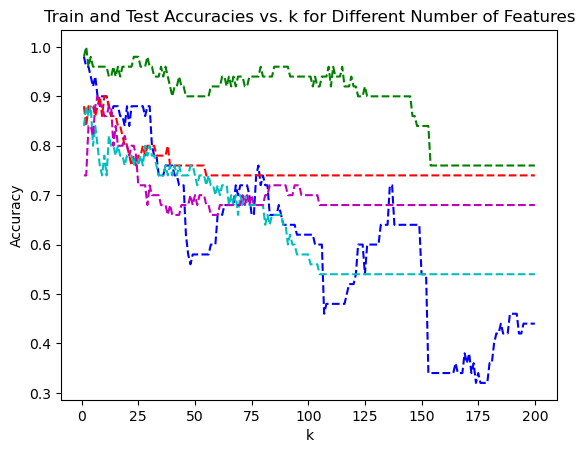

In [66]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, (train_accuracies, test_accuracies) in enumerate(zip(train_accuracies_list, test_accuracies_list)):
    k_values = range(1, len(train_accuracies) + 1)
    # plt.plot(k_values, train_accuracies, linestyle='-', color=colors[i])
    plt.plot(k_values, test_accuracies, label=f'{i+1} features', linestyle='--', color=colors[i])

plt.title('Train and Test Accuracies vs. k for Different Number of Features')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

# Multiclass Classification

In [14]:
rng = np.random.default_rng(seed = 1738)

num_centroids_per_class = 3
num_classes = 5
total_centroids = num_centroids_per_class * num_classes
num_features = 2

centroids = rng.normal(loc=0, scale=1, size=(total_centroids, num_features))


In [15]:
num_samples = 250
X = rng.normal(loc=0, scale=1, size=(num_samples, 2))

In [16]:
# assign class labels by computing distance to each centroid and assigning class based on closest one
class_num = np.zeros(num_samples) # because I'll convert to one-hot encoding later
for i in range(num_samples):
    x = X[i]
    distances = np.linalg.norm(x - centroids, axis=1)
    class_num[i] = np.argmin(distances) % num_classes

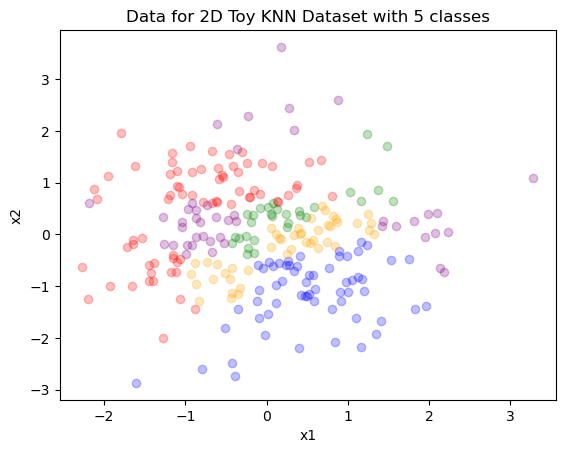

In [17]:
# plot
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(num_classes):
    X_class = X[class_num == i]
    plt.scatter(X_class[:, 0], X_class[:, 1], c=colors[i], alpha=0.25)

plt.title('Data for 2D Toy KNN Dataset with 5 classes')
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

In [18]:
# convert class_num to one-hot encoding
y = np.zeros((num_samples, num_classes))
for i in range(num_samples):
    y[i, class_num[i].astype(int)] = 1

y.shape, np.unique(y)

((250, 5), array([0., 1.]))

In [19]:
X_train, y_train, X_test, y_test = split_dataset(X, y, test_size=0.2, seed=1738)

In [20]:
y_train

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0.

In [21]:
model = KNearestNeighborsClassifier(type='multiclass')
model.fit(X_train, y_train)

In [22]:
model(X_test, k=3)

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0.

In [23]:
accuracies = np.zeros(X_train.shape[0])
for k in range(1, X_train.shape[0]+1):
    accuracy = model.accuracy(X, y, k)
    accuracies[k-1] = accuracy


In [24]:
model(X_train)

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0.

Text(0, 0.5, 'Accuracy')

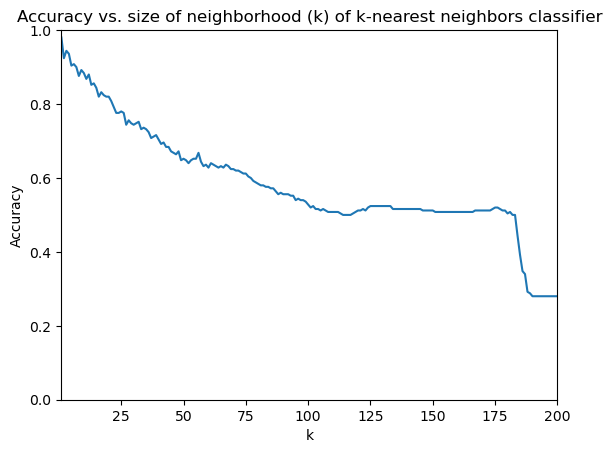

In [25]:
plt.plot(range(1, X_train.shape[0]+1), accuracies)

plt.xlim([1, X_train.shape[0]])
plt.ylim([0, 1])

plt.title('Accuracy vs. size of neighborhood (k) of k-nearest neighbors classifier')
plt.xlabel('k')
plt.ylabel('Accuracy')

^^ theres is no fucking way this is correct

In [26]:
y_hat = model(X)
(y_hat == y).mean()

np.float64(0.9776)

In [27]:
accuracies.shape

(200,)